# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

# load boston dataset
boston = load_boston()

#define the boston features
boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
# don't transform b
b = boston_features["B"]
# log transform DIS and LSTAT
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling for B and logDIS
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization for LSTAT
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [6]:
# select only features from previous stepwise selection
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
# extract target from boston and set as target
y = pd.DataFrame(boston.target,columns = ["target"])

In [7]:
# check type of y to ensure it's a series
type(y)

pandas.core.frame.DataFrame

## Perform a train-test-split

In [21]:
# import the train test split function
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
# check lengths of each new split
print(len(X_train), len(X_test), len(y_train), len(y_test))

379 127 379 127


## Apply your model to the train set

#### Importing and initializing the model class

In [23]:
# import the linear regression function
from sklearn.linear_model import LinearRegression
# instantiate model
linreg = LinearRegression()

#### Fitting the model to the train data

In [24]:
# fit the linreg object to the training data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Calculating predictions on the train set, and on the test set

In [25]:
# predict y_hat with the train set
y_hat_train = linreg.predict(X_train)
# predict y_hat with the test set
y_hat_test = linreg.predict(X_test)

#### Calculating your residuals

In [26]:
# get residuals for the training set
train_residuals = y_hat_train - y_train
# get residuals for the testing set
test_residuals = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [27]:
# import the MSE metric form sklearn
from sklearn.metrics import mean_squared_error

In [28]:
# save the trained MSE
train_MSE = mean_squared_error(y_train, y_hat_train)
# save the test MSE
test_MSE = mean_squared_error(y_test, y_hat_test)
# print both MSEs and compare
print(f"Train MSE: {train_MSE}\n")
print(f"Test MSE: {test_MSE}")


Train MSE: 19.978676033583906

Test MSE: 27.402154986487563


If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

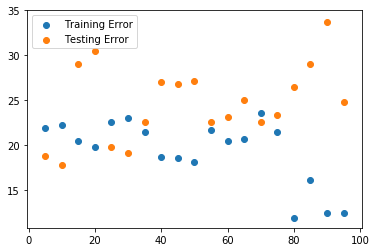

In [29]:
# import the random lib
import random
# set the random seed
random.seed(11)

# instantiate empty lists to hold the training and testing errors for plotting
train_err = []
test_err = []
#create a list of values between 5 and 100, incrementing at 5
t_sizes = list(range(5,100,5))
# loop over every test size
for t_size in t_sizes:
    # define the train and test data for the given test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    # create a linear regression model and fit the training data
    linreg.fit(X_train, y_train)
    # predict y_hat using the training data
    y_hat_train = linreg.predict(X_train)
    # predict y_hat using the testing data
    y_hat_test = linreg.predict(X_test)
    # append the MSE for the training predictions to the training error list
    train_err.append(mean_squared_error(y_train, y_hat_train))
    # append the MSE for the testing predictions to the testing error list
    test_err.append(mean_squared_error(y_test, y_hat_test))
    
# plot the training errors
plt.scatter(t_sizes, train_err, label='Training Error')
# plot the testing errors
plt.scatter(t_sizes, test_err, label='Testing Error')
# show the legend
plt.legend()

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

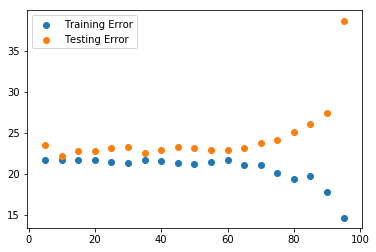

In [30]:
# set a random seed
random.seed(8)

# instantiate lists for training and testing errors
train_err = []
test_err = []
# create list between 5 and 100, incrementing by 5
t_sizes = list(range(5,100,5))
# loop over every test size
for t_size in t_sizes:
    # instantiate lists to hold temp MSEs
    temp_train_err = []
    temp_test_err = []
    # loop over the given train-test split 100 times (each train-test split will be different for a given test size)
    for i in range(100):
        # split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        # fit the model
        linreg.fit(X_train, y_train)
        # predict the training data
        y_hat_train = linreg.predict(X_train)
        # predict the testing data
        y_hat_test = linreg.predict(X_test)
        # append the test MSE for the current split to the temp training error
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        # append the train MSE for the current split to the temp testing error
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    # append the MEAN train error for the given split size to the train list
    train_err.append(np.mean(temp_train_err))
    # append the MEAN test error for the given split size to the test list
    test_err.append(np.mean(temp_test_err))
    
# plot the data and show legend
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

What's happening here? evaluate your result

After the testing size goes lower than 25%, the testing and training MSEs start to diverge. This means that as more data is allocated for training, the model becomes overfitted and cannot predict the outcome of the test data accurately. 

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.